In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


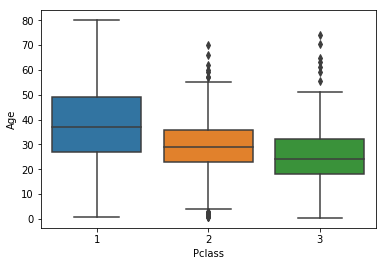

In [9]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

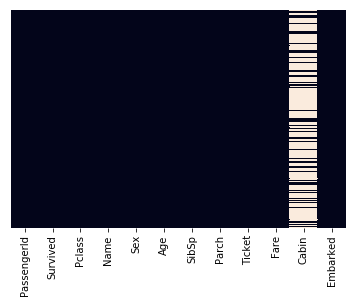

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [31]:
train.drop(['Cabin'], axis=1, inplace=True)

ValueError: labels ['Cabin'] not contained in axis

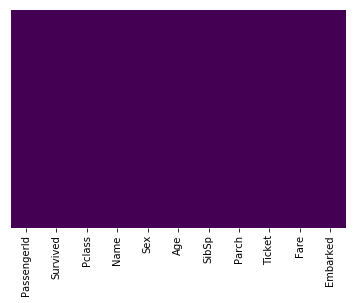

In [33]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
train.dropna(inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [38]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [39]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [40]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [41]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [43]:
train = pd.concat([train, sex, embark], axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1


In [45]:
train.drop(['Sex', 'Embarked', 'Name','Ticket'], axis=1, inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


In [47]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,29.0,0,0,13.00,1,0,1
887,888,1,1,37.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,37.0,0,0,30.00,1,0,0
890,891,0,3,24.0,0,0,7.75,1,1,0


In [48]:
train.drop('PassengerId', axis= 1, inplace=True)

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [50]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [51]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,24.0,1,0,7.2500,1,0,1
1,1,37.0,1,0,71.2833,0,0,0
2,3,24.0,0,0,7.9250,0,0,1
3,1,37.0,1,0,53.1000,0,0,1
4,3,24.0,0,0,8.0500,1,0,1


In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()

In [56]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
prediction = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86       163
          1       0.84      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test, prediction)

array([[150,  13],
       [ 36,  68]], dtype=int64)

In [65]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [69]:
pclass = pd.get_dummies(train['Pclass'], drop_first= True)

In [70]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [71]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [72]:
train = pd.concat([train, pclass], axis= 1)

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,24.0,1,0,7.2500,1,0,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1,0,1
3,1,1,37.0,1,0,53.1000,0,0,1,0,0
4,0,3,24.0,0,0,8.0500,1,0,1,0,1


In [74]:
train.drop('Pclass', axis=1, inplace= True)

In [75]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,24.0,1,0,7.2500,1,0,1,0,1
1,1,37.0,1,0,71.2833,0,0,0,0,0
2,1,24.0,0,0,7.9250,0,0,1,0,1
3,1,37.0,1,0,53.1000,0,0,1,0,0
4,0,24.0,0,0,8.0500,1,0,1,0,1


In [76]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [77]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,24.0,1,0,7.2500,1,0,1,0,1
1,37.0,1,0,71.2833,0,0,0,0,0
2,24.0,0,0,7.9250,0,0,1,0,1
3,37.0,1,0,53.1000,0,0,1,0,0
4,24.0,0,0,8.0500,1,0,1,0,1


In [78]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [80]:
logmodel2 = LogisticRegression()

In [81]:
logmodel2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
pred = logmodel2.predict(X_test)

In [85]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87       163
          1       0.86      0.65      0.74       104

avg / total       0.83      0.82      0.82       267



In [84]:
confusion_matrix(y_test, prediction)

array([[150,  13],
       [ 36,  68]], dtype=int64)